First, we import the basic libraries that we are going to use - pandas, numpy, seaborn and matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, we print 5 random rows to get an idea what the dataset looks like. We can see that there are 25 columns (their meaning is described in the project assignment) - 24 explanatory variables and 1 binary target variable.

In [ ]:
df = pd.read_csv("trains.csv")
df.sample(5, random_state = 42)

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
103044,3,2,4,66,2,3,2568032,3,2,2,...,3,N,4,2016-03-01 13:49,1678,4,leisure,0,4,4
43282,4,4,2,38,2,2,6640873,2,2,4,...,2,Y,4,2016-02-21 11:59,954,1,work,3,4,4
65543,2,4,2,38,1,2,1967367,1,1,4,...,1,N,2,2016-02-19 12:44,189,2,work,0,1,2
65083,5,4,1,32,5,2,8257934,5,1,4,...,2,N,1,2016-02-23 23:52,175,1,leisure,0,3,1
76496,1,1,4,33,5,5,5397418,5,5,5,...,5,Y,4,2016-02-25 17:30,1990,4,work,0,4,4


It is also useful to see how many observations (rows) we have: 129880.

In [ ]:
df.shape

(129880, 25)

Another necessary information we want is the number of missing values. In this dataset, only 'Arrival Delay in Minutes' column has missing values, in particular 393.

In [ ]:
display(df.isnull().sum())

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

Since 393 rows represent only 0.3% of all the observations we have, the simple and time efficient solution is to drop them.

In [ ]:
df = df.dropna()

We check if there are duplicates - there are not any.

In [ ]:
df[df.duplicated()]

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating


As we could have seen above, the target variable is in Y/N form so in the next step we convert it into 1/0 to be able to calculate for example a correlation with numeric features later.

In [ ]:
df['Satisfied'] = np.where(df['Satisfied'] == 'Y', 1, 0)

A detailed list of all the variables is available below. As described in the assignment, there are many "rating-type" integer features, a few other numeric features (Age, Ticket ID, Departure and Arrival Delays, Distance), categorical features (Ticket Class, Loyalty, Gender, Date and Time, Work or Leisure) and target Satisfied

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129487 non-null  int64  
 1   Onboard General Rating         129487 non-null  int64  
 2   Food'n'Drink Rating            129487 non-null  int64  
 3   Age                            129487 non-null  int64  
 4   Departure Arrival Time Rating  129487 non-null  int64  
 5   Onboard WiFi Rating            129487 non-null  int64  
 6   Ticket ID                      129487 non-null  int64  
 7   Checkin Rating                 129487 non-null  int64  
 8   Track Location Rating          129487 non-null  int64  
 9   Baggage Handling Rating        129487 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129487 non-null  object 
 12  Loyalty                       

A good way to get an idea about the distribution of all the numeric features is using df.describe(). We found it beneficial because we can see that all the rating attributes do not have any "wrong values" (<0 or >5), also all the other features have data in reasonable ranges and another good news is that the target variable is quite balanced (43/57%).

In [ ]:
df.describe()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,1.294870e+05,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,3.351078,3.642373,3.204685,39.428761,3.057349,2.728544,5.494316e+06,3.306239,2.976909,3.631886,15.091129,3.252720,2.756786,0.434499,3.358067,1190.210662,3.441589,14.643385,3.383204,3.286222
std,1.316132,1.176614,1.329905,15.117597,1.526787,1.329235,2.597006e+06,1.266146,1.278506,1.180082,38.465650,1.350651,1.401662,0.495693,1.334149,997.560954,1.319168,37.932867,1.287032,1.313624
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000025e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,27.000000,2.000000,2.000000,3.239474e+06,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,40.000000,3.000000,3.000000,5.496288e+06,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,0.000000,4.000000,844.000000,4.000000,0.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000,51.000000,4.000000,4.000000,7.740262e+06,4.000000,4.000000,5.000000,13.000000,4.000000,4.000000,1.000000,4.000000,1744.000000,5.000000,12.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,85.000000,5.000000,5.000000,9.999975e+06,5.000000,5.000000,5.000000,1584.000000,5.000000,5.000000,1.000000,5.000000,4983.000000,5.000000,1592.000000,5.000000,5.000000


Because Ticket ID is useless for prediction, we remove it.

In [ ]:
df.drop(['Ticket ID'], axis="columns", inplace=True)

We could also see that Date and Time is in a categorical form which is incorrect so we convert it to datetime to be able to use it later.

In [ ]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['Date and Time']

0        2016-02-19 10:53:00
1        2016-02-26 15:39:00
2        2016-02-26 07:26:00
3        2016-02-27 08:32:00
4        2016-02-27 14:37:00
                 ...        
129875   2016-02-16 05:41:00
129876   2016-03-01 02:21:00
129877   2016-02-20 00:13:00
129878   2016-02-18 13:05:00
129879   2016-02-22 18:30:00
Name: Date and Time, Length: 129487, dtype: datetime64[ns]

Following graphs can help us not only understand really well the distrubution of categorical and rating variables but also the share of satisfied/unsatisfied on individual categories/ratings which can be the first indication of predictive power of these features. We can see that:
Ticket Class: Premium class increases the probability of Satisfied while Economy and Smart significantly decrease,
Loyalty: the probability of Sat. is higher for loyal,
Gender: no significant difference,
Work or Leisure: Leisure significantly decreases the property of Sat.,
Legromm Service Rating: if <=3 then relatively low Sat. rate compared to higher,
Onboard General Rating: same as previous,
Food'n'Drink Rating: increasing trend of Sat. rate with increasing rating,
Onboard WiFi Rating: if rating = 5, then the customer is almost for sure Sat. What is strange is rating 0 where not only the frequency is relatively high but also it is suspicious that such customers are satisfied - in real world it would be nice to check if the data is correct and if it's not a mistake,
Checkin Rating: increasing trend,
Track Location Rating: probably insignificant,
Baggage Handling Rating: a "jump" between rating 3 and 4,
Boarding Rating: same as previous, even more significant,
Online Booking Rating: increasing trend,
Onboard Entertainment Rating: increasing trend,
Seat Comfort Rating: increasing trend,
Onboard Service Rating: increasing trend,
Cleanliness Rating: increasing trend.

In general, we can say that the findings are not really surprising - with increasing rating the probability of satisfied customer increases. Positive is that most of the features seem that they could have a significant predictive power, only Gender and Track Location Rating don't seem to be very useful from the first view.

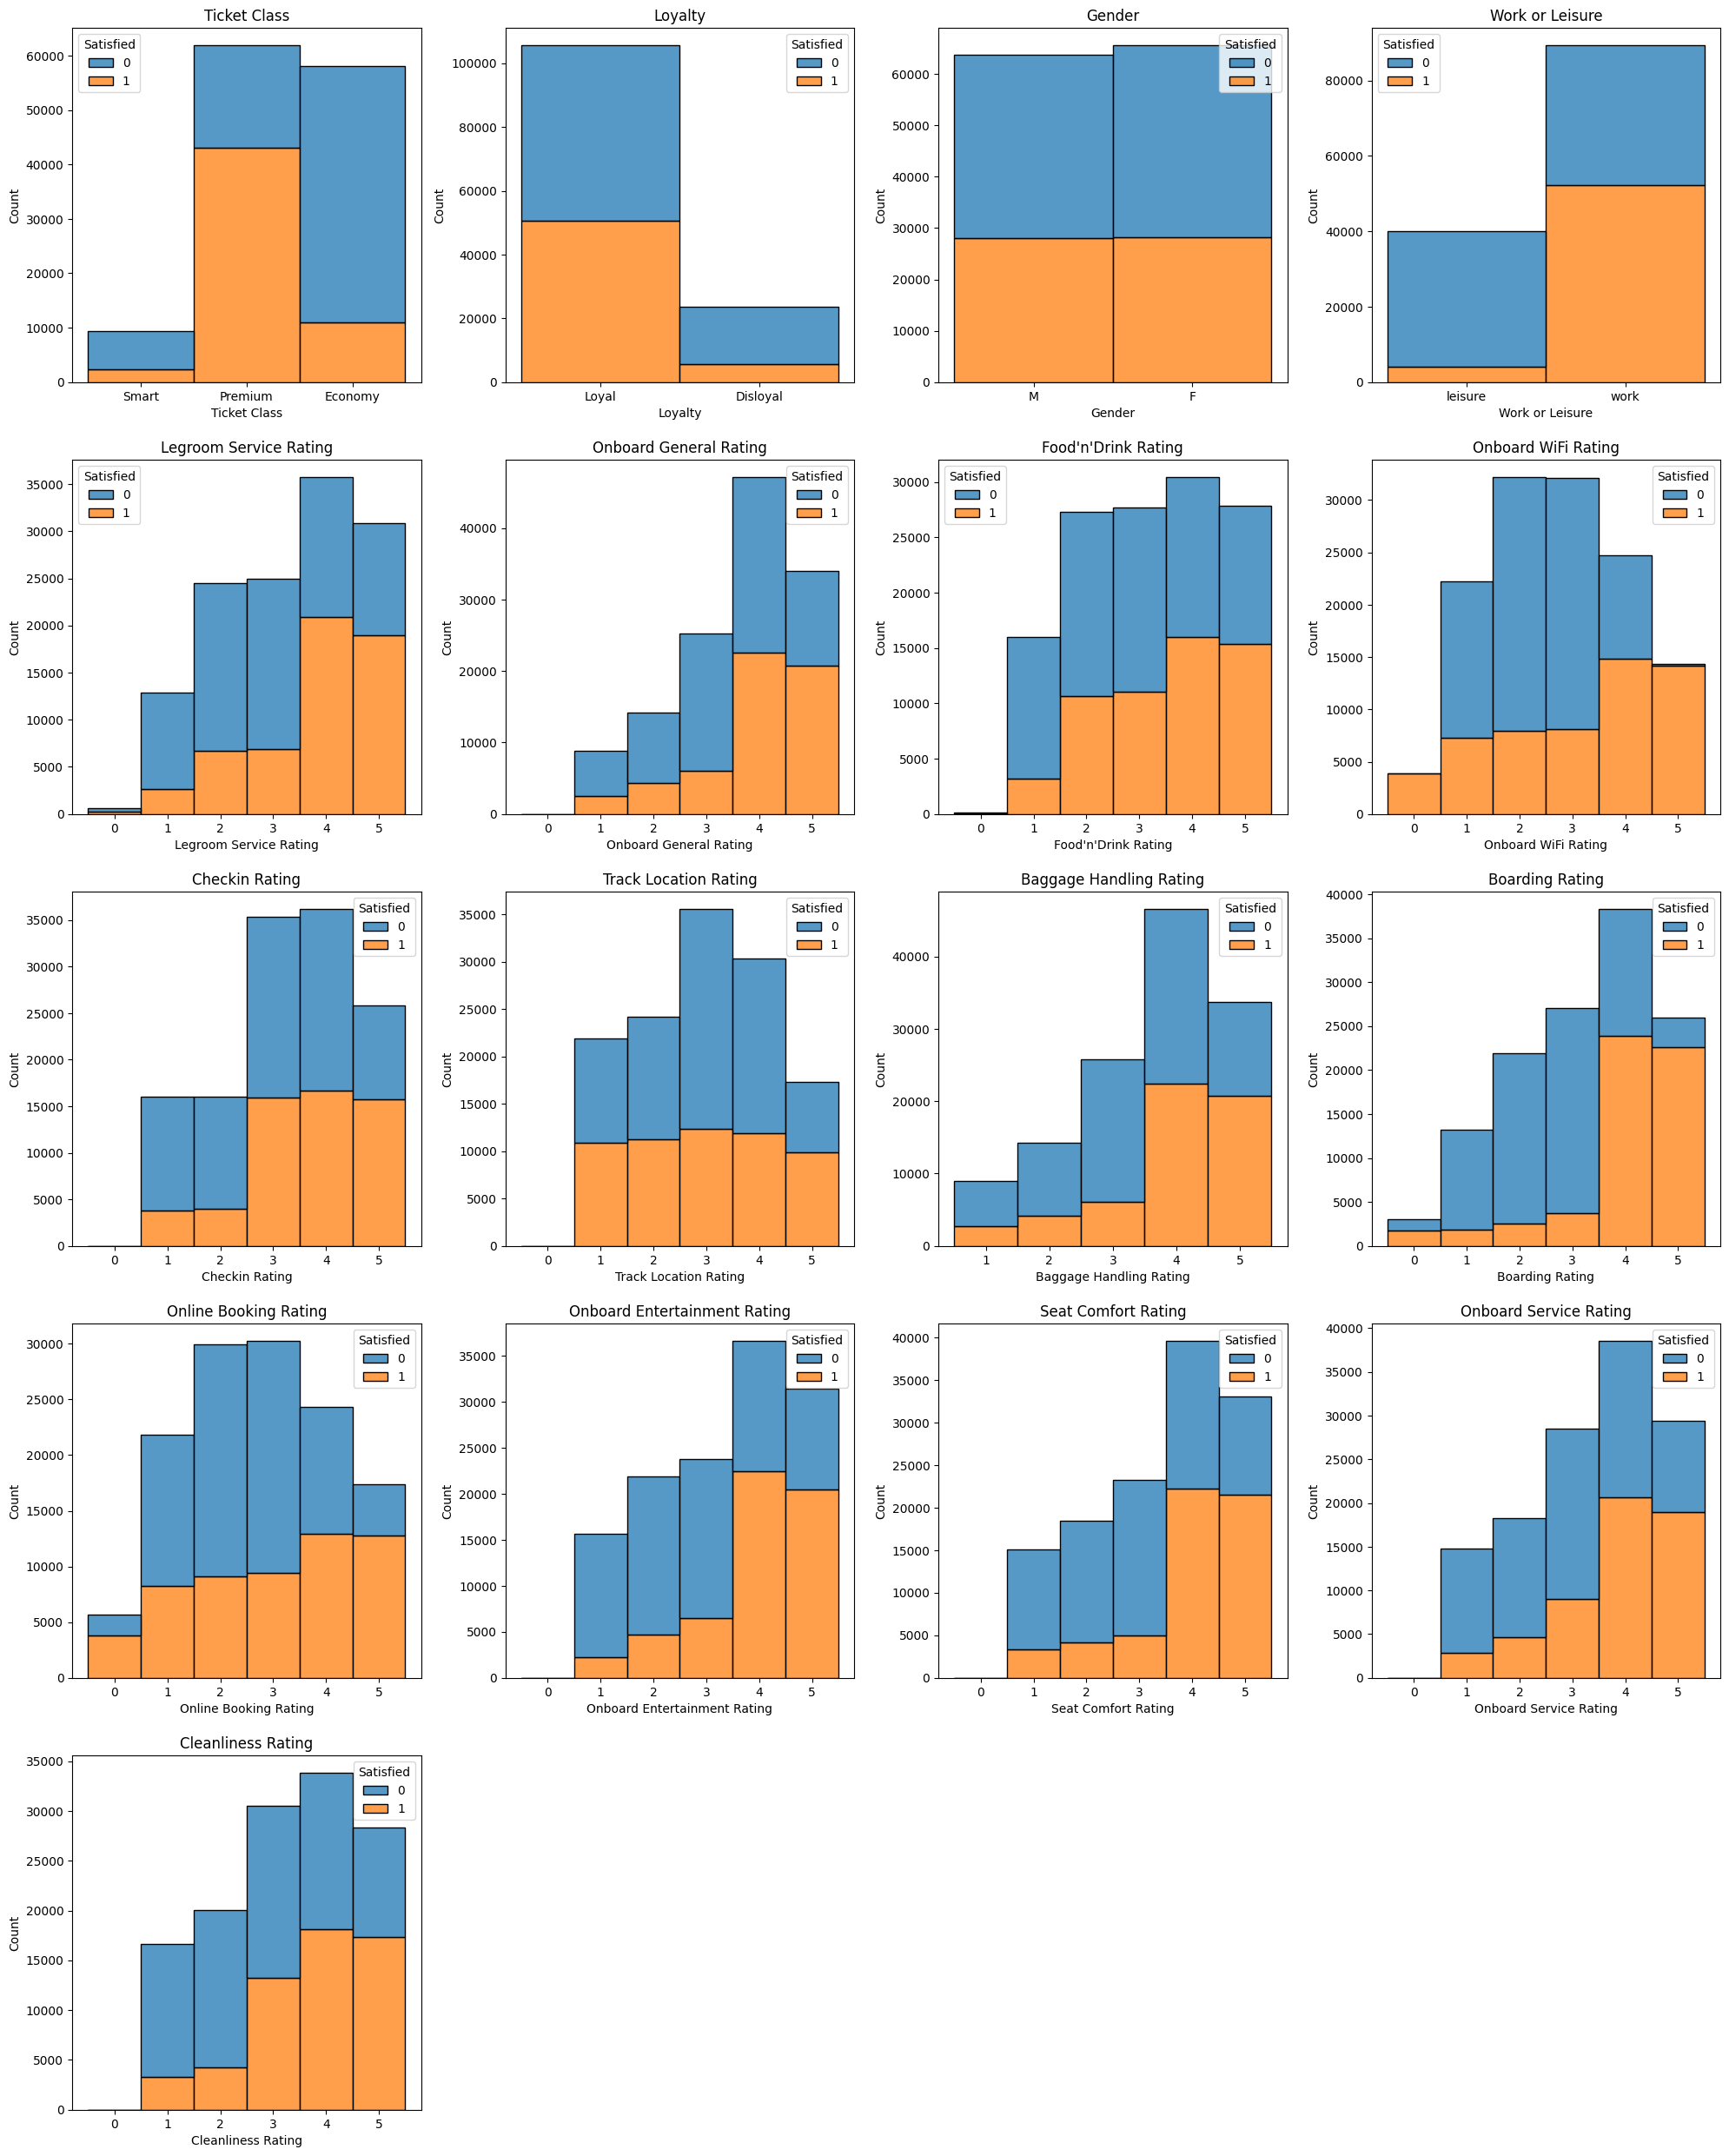

In [ ]:
columns=['Ticket Class','Loyalty','Gender','Work or Leisure','Legroom Service Rating','Onboard General Rating',"Food'n'Drink Rating",'Onboard WiFi Rating','Checkin Rating','Track Location Rating','Baggage Handling Rating','Boarding Rating','Online Booking Rating','Onboard Entertainment Rating','Seat Comfort Rating','Onboard Service Rating','Cleanliness Rating']
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for ax, column in zip(axes, columns):
    sns.histplot(df, x=column, hue='Satisfied', multiple='stack', discrete=True, ax=ax)
    ax.set_title(column)
for i in range(len(columns), len(axes)):
  axes[i].set_visible(False)
plt.subplots_adjust(hspace=10)
plt.tight_layout()
plt.show()

From the pairplots for other numeric variables we can see that longer distance might positively influence client satisfaction and also that (not surprisingly) the arrival and departure delays are strongly correlated.

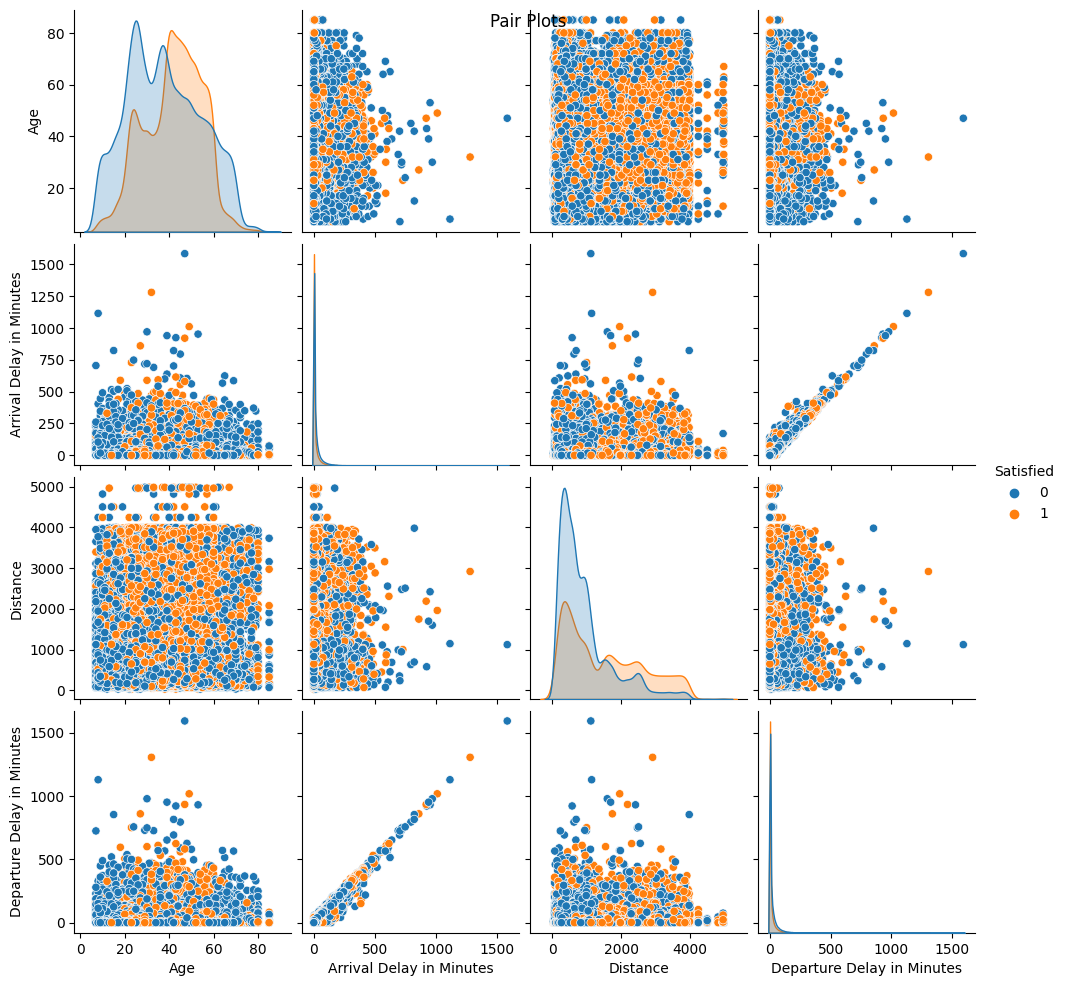

In [ ]:
sns.pairplot(df, vars=['Age','Arrival Delay in Minutes', 'Distance', 'Departure Delay in Minutes'], hue='Satisfied')
plt.suptitle("Pair Plots")
plt.show()

The correlation matrix basically confirms what we have mentioned above - there is a strong correlation between departure and arrival delays and if we focus on correlation with Satisfied, most of the rating features + distance are positively correlated with this one (and there is no significant correlation with age or delays).

<ipython-input-14-9bf84140c047>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


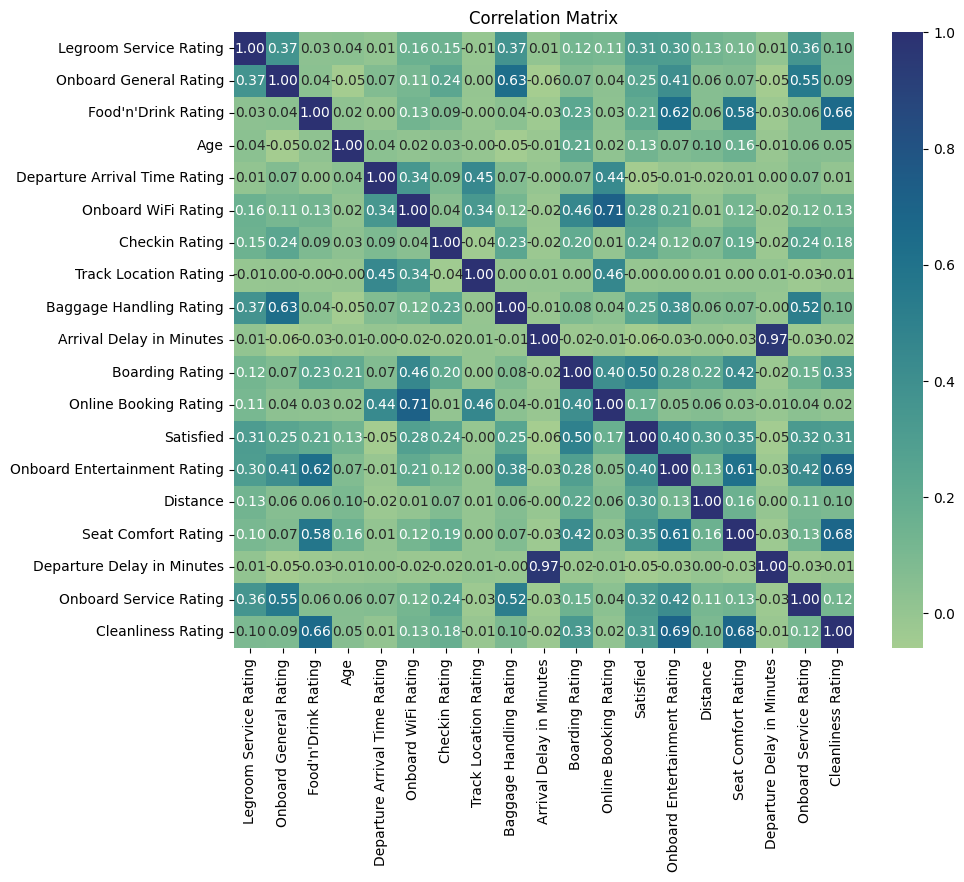

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Although there does not seem to be a direct effect of departure/arrival delay on the satisfaction, it might be interesting to check whether the delay change during a "trip" affects it so we create a new column Delay Change as Arrival Delay in Minutes - Departure Delay in Minutes (and we also drop the arrival delay column because of the strong correlation with departure delay).

In [ ]:
df['Delay Change'] = df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']
df.drop(['Arrival Delay in Minutes'], axis="columns", inplace=True)

To get an overview about the distribution of (from the distribution point of view) not yet analysed features we plot the histograms of Age, Delay Change, Distance and departure delay. Age is distributed relatively standardly, Delay Change is concentrated mostly around 0 (and the values higher than +- 50 seem to be outliers), Departure Delay is also mostly around 0 and when > +- 300 not really frequent, distance has decreasing trend until 4000 and after this value there are just a few outliers.

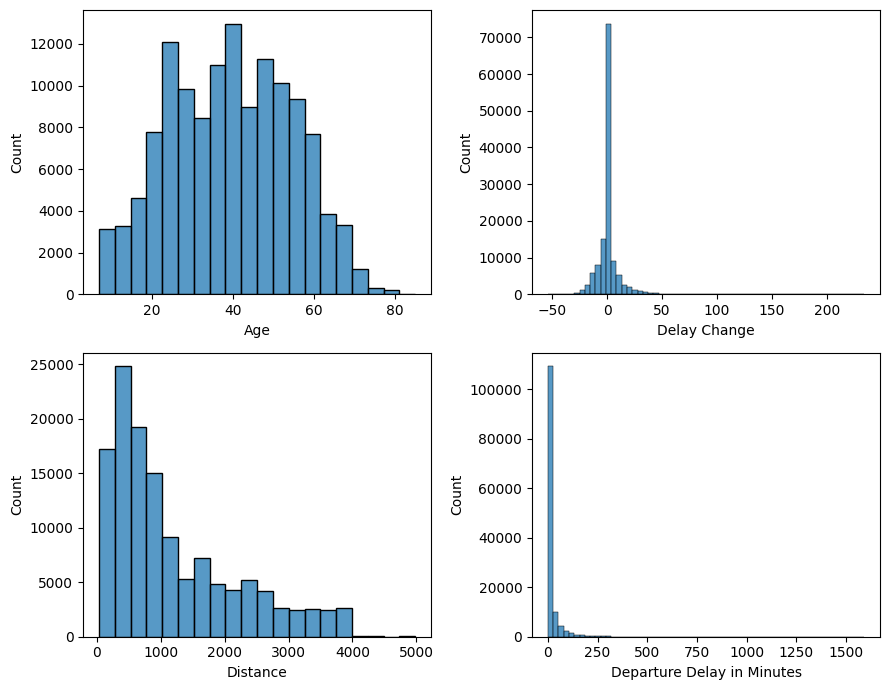

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

sns.histplot(data=df, x='Age', bins=20, ax=axs[0, 0])

sns.histplot(data=df, x='Distance', bins=20, ax=axs[1, 0])

sns.histplot(data=df, x='Departure Delay in Minutes', bins=60, ax=axs[1, 1])

sns.histplot(data=df, x='Delay Change', bins=60, ax=axs[0, 1])

plt.tight_layout()
plt.show()

Based on the previous finding we decided to remove potential most significant outliers for these numeric attributes (the thresholds were selected iteratively so that we don't remove too many values, just a few)

In [ ]:
print((df['Delay Change'] > 100).sum())
print((df['Distance'] > 4000).sum())
print((df['Departure Delay in Minutes'] > 400).sum())

55
78
99


In [ ]:
df.drop(df[df['Delay Change'] > 100].index, inplace=True)
df.drop(df[df['Distance'] > 4000].index, inplace=True)
df.drop(df[df['Departure Delay in Minutes'] > 400].index, inplace=True)
df.shape

(129256, 24)

After doing that, we can create a boxplots and see that there are still some outliers remaining, however, the situation is much better that it was before.

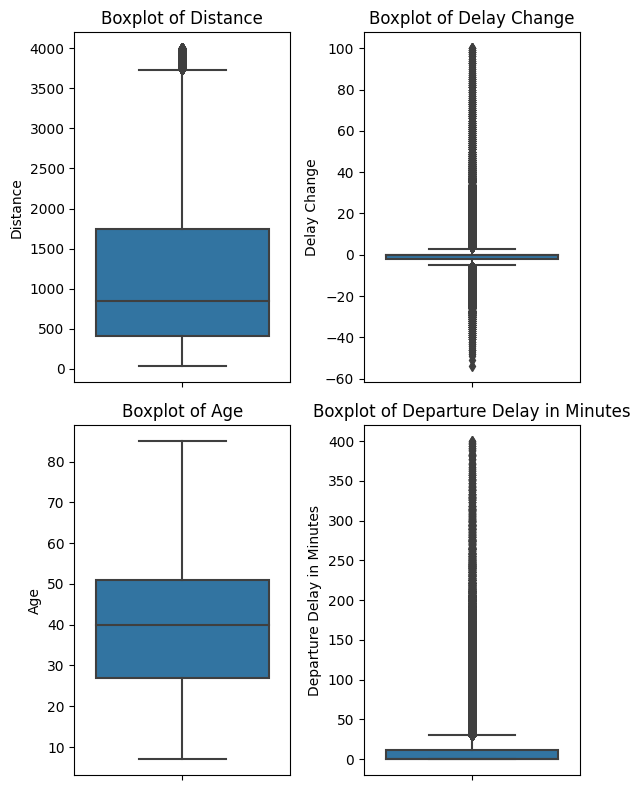

In [ ]:
plt.figure(figsize=(6,8))

columns_to_plot = ['Distance', 'Delay Change', 'Age', 'Departure Delay in Minutes']

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Now it's time to inspect whether our manually created column, delay change, can help us better predict the client satisfaction. From the chart below it might look like there is some impact (delay increase = negative impact and vice versa), however, in this form it's not visible really well.

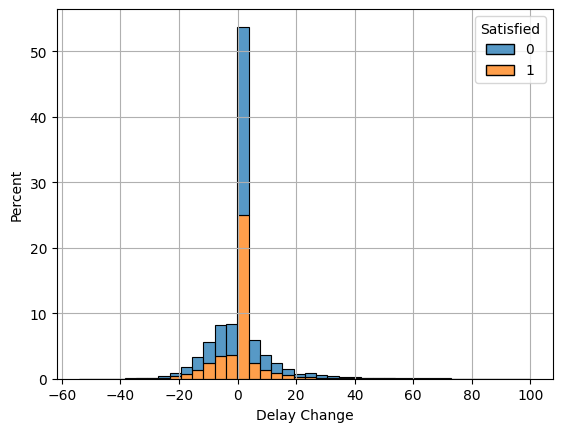

In [ ]:
ax = sns.histplot(df, x = 'Delay Change', hue='Satisfied', multiple='stack', stat='percent', bins = 40)
ax.grid()

So we created also the following chart of Proportion of Satisfied on Delay Change which shows us there could be some trend.

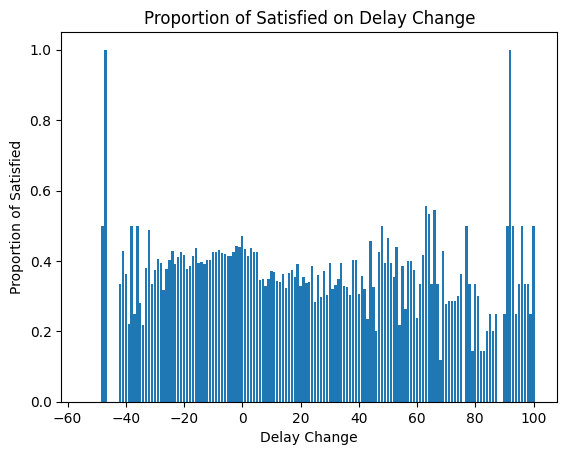

In [ ]:
proportion_by_numeric = df.groupby('Delay Change')['Satisfied'].mean()
plt.bar(proportion_by_numeric.index, proportion_by_numeric.values)
plt.xlabel('Delay Change')
plt.ylabel('Proportion of Satisfied')
plt.title('Proportion of Satisfied on Delay Change')
plt.show()

the correlation is basically 0 which is not a good news, but if we take into account that this variable is concentrated mainly between -25 and 25 and in this area the trend seems to be kind of quadratic (the correlation captures only linear dependence), we will try to work with this attribute.

In [ ]:
df['Satisfied'].corr(df['Delay Change'])

-0.03166252597234746

Daytime itself tells us nothing so we will try to extract some information from it, in particular month, weekday and hour and check if it can help us with our prediction.

In [ ]:
df['Day'] = df['Date and Time'].dt.day_name()
df['Month'] = df['Date and Time'].dt.month
df['Hour'] = df['Date and Time'].dt.hour

We can see that our dataset contains values mostly from February and a few from March, which is useless, so we will not use this information.

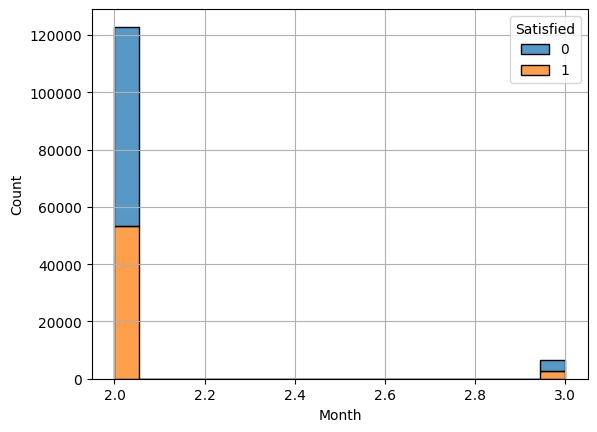

In [ ]:
ax = sns.histplot(df, x = 'Month', hue='Satisfied', multiple='stack')
ax.grid()

In [ ]:
df.drop(['Month'], axis="columns", inplace=True)

Regarding hour we can see that the proportion of satisfied clients is basically constant during a day so neither this information we are going to use.

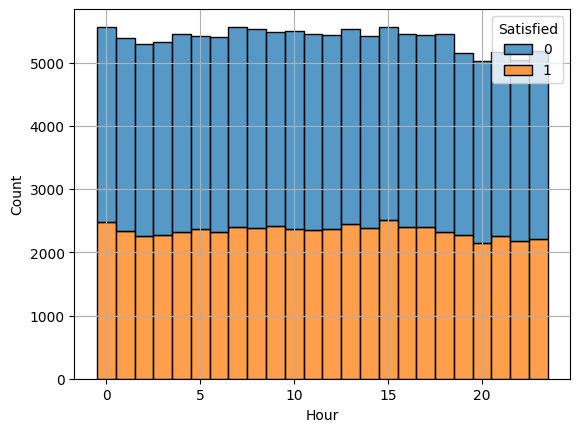

In [ ]:
ax = sns.histplot(df, x = 'Hour', hue='Satisfied', multiple='stack', discrete=True)
ax.grid()

In [ ]:
df.drop(['Hour'], axis="columns", inplace=True)

When looking at the weekdays, we can see that the most people travel on Mondays and Tuesdays, however, the proportion of satisfied is again almost constant so we will not use even this.

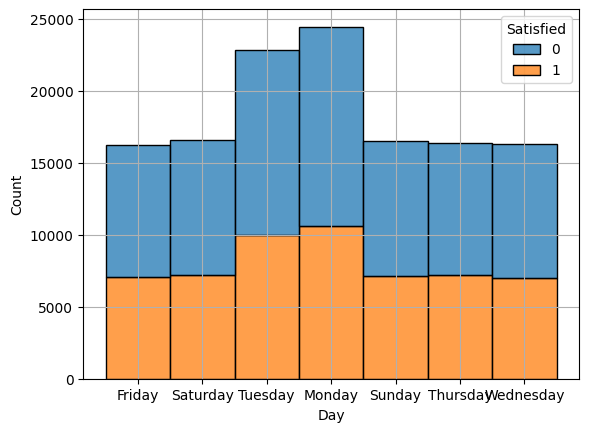

In [ ]:
ax = sns.histplot(df, x = 'Day', hue='Satisfied', multiple='stack')
ax.grid()

In [ ]:
df.drop(['Day'], axis="columns", inplace=True)
df.drop(['Date and Time'], axis="columns", inplace=True)

The last remaining step in EDA/preprocessing is to convert categorical variables into dummy variables.

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Now we can finally start building our model. The first essential step is to split the dataset into train and test part (we decided to split it 75/25 which is one of the common options and although the target variable is relatively balanced, we though why not to use stratify option)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Satisfied', axis=1)
y = df['Satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

The first algorithm that we want to use is the decision tree so we build a model with default parameters and predict both train and test set so that we can compare metrics on these 2 parts of the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

Looking at the test report and confusion matrix, we can say that the model is very likely overfitted. However, even on the test set the performance is relatively good - all precision, accuracy, recall and f1 around 95%.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54826
           1       1.00      1.00      1.00     42116

    accuracy                           1.00     96942
   macro avg       1.00      1.00      1.00     96942
weighted avg       1.00      1.00      1.00     96942

[[54826     0]
 [    0 42116]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18276
           1       0.93      0.94      0.94     14038

    accuracy                           0.95     32314
   macro avg       0.94      0.95      0.95     32314
weighted avg       0.95      0.95      0.95     32314

[[17349   927]
 [  821 13217]]


Since the previous model was with default parameters and as we said, it was very likely an overfit, we are now going to try to tune it's hyperparameters. Selected ones are max_depth, min_samples_split, criterion and min_samples_leaf (all of them described below).

In [ ]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 5)]
max_depth.append(8)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Criterion of based on which measure to split the tree
criterion = ['gini', 'entropy']
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 7, 10]

param_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

print(param_grid)

{'max_depth': [5, 13, 22, 31, 40, 8], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4, 7, 10], 'criterion': ['gini', 'entropy']}


Because the grid search was running for too long, we decided to go a faster way with randomized search. Even randomized search ran for a long time so its results are "hardcoded" below, however, if the user wants to run it again, it can be easily done.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#clf = DecisionTreeClassifier()
#clf_grid = RandomizedSearchCV(estimator = clf, n_iter = 100, param_distributions = param_grid, cv = 3, verbose=1, n_jobs = -1, random_state=42)
#clf_grid.fit(X_train,y_train)

#result = clf_grid.best_params_
result = {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 13, 'criterion': 'gini'}
print(result)

{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 13, 'criterion': 'gini'}


Now we can fit the decision tree with tuned hyperparameters to see how much was the model improved. We can see that the accuracy remained +- the same and the f1 score was increased by 0.01 so we would say this model is quite strong for being a "simple" decision tree.

In [ ]:
clf = DecisionTreeClassifier(**result)
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     54826
           1       0.98      0.94      0.96     42116

    accuracy                           0.96     96942
   macro avg       0.97      0.96      0.96     96942
weighted avg       0.96      0.96      0.96     96942

[[53976   850]
 [ 2639 39477]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18276
           1       0.96      0.93      0.95     14038

    accuracy                           0.95     32314
   macro avg       0.95      0.95      0.95     32314
weighted avg       0.95      0.95      0.95     32314

[[17768   508]
 [ 1006 13032]]


We can also print and plot which features are the most important in our model. The most important is Food'n'Drink Rating followed by Delay Change (so our manually created feature is useful), Work or Leisure and Legroom Service Rating.

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=sorted(X)).sort_values(ascending=False)
feature_imp

Food'n'Drink Rating              0.404482
Delay Change                     0.195218
Work or Leisure_work             0.164177
Legroom Service Rating           0.049558
Ticket Class_Smart               0.043775
Departure Arrival Time Rating    0.028274
Seat Comfort Rating              0.020391
Distance                         0.016842
Departure Delay in Minutes       0.013445
Onboard Entertainment Rating     0.011288
Baggage Handling Rating          0.011219
Checkin Rating                   0.008104
Onboard WiFi Rating              0.007799
Loyalty_Loyal                    0.006023
Onboard Service Rating           0.004906
Age                              0.004470
Onboard General Rating           0.003069
Online Booking Rating            0.002406
Gender_M                         0.001943
Cleanliness Rating               0.001472
Boarding Rating                  0.000583
Track Location Rating            0.000484
Ticket Class_Premium             0.000073
dtype: float64

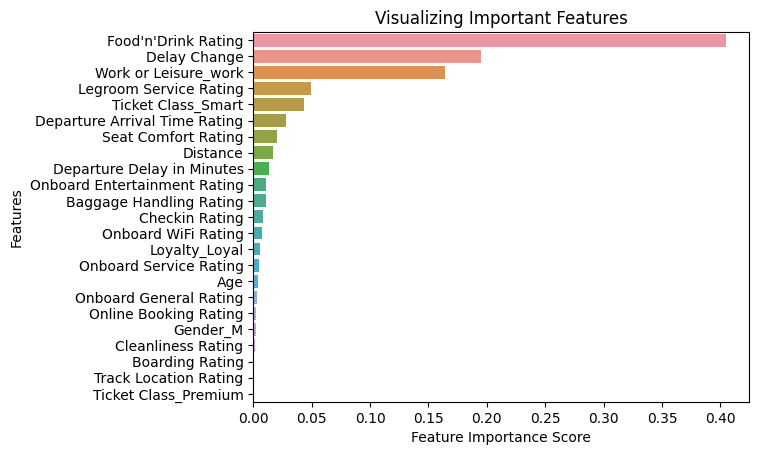

In [ ]:
sns.barplot(y=feature_imp.index, x=feature_imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

Another algorithm that we want to try is random forest to see if it outperforms the simple decision tree since it theoretically should. The results confirm it since there are fewer errors than in the dec. tree model and all the metrics are about 0.01 higher (so for example the test precision is 96%)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state = 42)
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54826
           1       1.00      1.00      1.00     42116

    accuracy                           1.00     96942
   macro avg       1.00      1.00      1.00     96942
weighted avg       1.00      1.00      1.00     96942

[[54826     0]
 [    0 42116]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18276
           1       0.97      0.95      0.96     14038

    accuracy                           0.96     32314
   macro avg       0.97      0.96      0.96     32314
weighted avg       0.96      0.96      0.96     32314

[[17896   380]
 [  770 13268]]


However, we can still try tu tune its hyperparameters to obtain even better model. The selected tuned hyperparameters are almost the same as for the decision tree model, only n_estimators was added.

In [ ]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
max_depth.append(8)
max_depth.append(3)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Criterion of based on which measure to split the tree
criterion = ['gini', 'entropy']
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 7]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 350, num = 4)]

param_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators': n_estimators,
               'criterion': criterion}

print(param_grid)

{'max_depth': [5, 10, 15, 20, 25, 8, 3], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4, 7], 'n_estimators': [50, 150, 250, 350], 'criterion': ['gini', 'entropy']}


Although there were only 100 iterations with cv = 3, it took almost an hour to compute it so again, the result of tuning is hardcoded below but can be easily performed again if necessary.

In [ ]:
#clf = RandomForestClassifier(random_state=42)
#clf_grid = RandomizedSearchCV(estimator = clf, n_iter = 100, param_distributions = param_grid, cv = 3, verbose=1, n_jobs = -1, random_state=42)
#clf_grid.fit(X_train,y_train)

#result = clf_grid.best_params_
result = {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25, 'criterion': 'entropy'}
print(result)

{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25, 'criterion': 'entropy'}


Although it took so much time to calculate it, the performance of tuned random forrest model is almost identical with the basic random forrest model, so either it is not possible to obtain even better results or it would be necessary to try to tune hyperparameters in a differen way.

In [ ]:
clf = RandomForestClassifier(**result)
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     54826
           1       1.00      0.99      0.99     42116

    accuracy                           1.00     96942
   macro avg       1.00      0.99      1.00     96942
weighted avg       1.00      1.00      1.00     96942

[[54768    58]
 [  394 41722]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18276
           1       0.97      0.94      0.96     14038

    accuracy                           0.96     32314
   macro avg       0.97      0.96      0.96     32314
weighted avg       0.97      0.96      0.96     32314

[[17917   359]
 [  778 13260]]


In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=sorted(X)).sort_values(ascending=False)
feature_imp

Delay Change                     0.167690
Food'n'Drink Rating              0.157144
Work or Leisure_work             0.097202
Seat Comfort Rating              0.084003
Legroom Service Rating           0.054864
Onboard Entertainment Rating     0.041990
Gender_M                         0.041884
Age                              0.038704
Ticket Class_Smart               0.038366
Loyalty_Loyal                    0.034299
Checkin Rating                   0.032604
Onboard Service Rating           0.030940
Distance                         0.027138
Departure Arrival Time Rating    0.026056
Baggage Handling Rating          0.025620
Onboard WiFi Rating              0.025539
Cleanliness Rating               0.017172
Departure Delay in Minutes       0.015921
Boarding Rating                  0.012523
Online Booking Rating            0.012407
Onboard General Rating           0.012203
Track Location Rating            0.004051
Ticket Class_Premium             0.001681
dtype: float64

Again, we can inspect the feature importance and see the most important features are almost identical with the decision tree model: Delay CHange, Food and Drink Rating, Seat Comfort Rating, Work/Leisure and Legroom Service Rating, while the least important is again Track Location Rating.

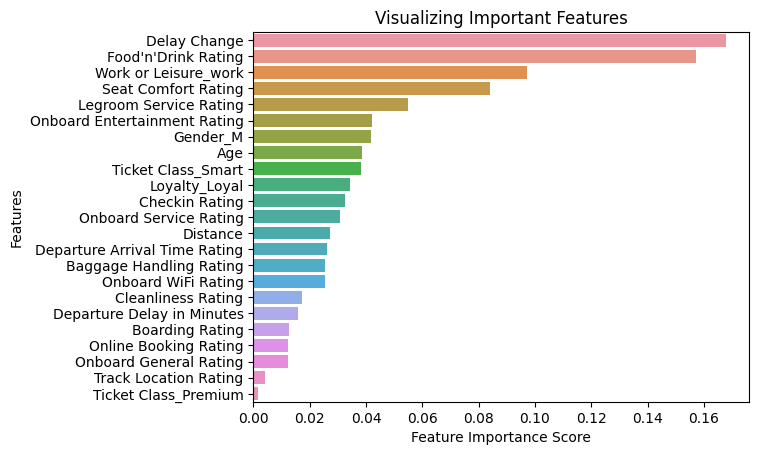

In [ ]:
sns.barplot(y=feature_imp.index, x=feature_imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

Finally, we can build our third model - logistic regression. Because it didn't reach optimal solution with default max number of iterations, we increased it to 5000 to make sure we get a good fit with other hyperparameters using default values. We can see that compared to the previous models this one is not that good because the accuracy on the test set is "only" 88% and also precision and recall are both significantly lower compared to the previous models.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     54826
           1       0.87      0.84      0.85     42116

    accuracy                           0.87     96942
   macro avg       0.87      0.87      0.87     96942
weighted avg       0.87      0.87      0.87     96942

[[49545  5281]
 [ 6907 35209]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18276
           1       0.87      0.84      0.85     14038

    accuracy                           0.88     32314
   macro avg       0.87      0.87      0.87     32314
weighted avg       0.88      0.88      0.87     32314

[[16559  1717]
 [ 2311 11727]]


After that, we again tried to tune the hyperparameters.

Hyperaparameter explanation:

The parameter C is  the inverse of the regularization, so, lower the C, higher the regularization


Penalty aims to decrease the model's generalization error, it's designed to deter and cotrol overfitting.

Solver is the algorithm to use in the model, there are several choices, the one that we tuned (liblinear), it's the one recommended for high-dimensional datasets, because it works well on large-scale problems.

Because of the long runtime, after we executed the code, we decided to hardcode the ouput to make the code run faster.

In [ ]:
from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#    'penalty': ['l1','l2'],
#    'solver': ['liblinear', 'saga']}

#clf = LogisticRegression(max_iter=100)

#clf_gs=GridSearchCV(clf, param_grid, cv=5)

#clf_gs.fit(X_train, y_train)

#result = clf_gs.best_params_

result = {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

print(result)

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


As we can see, the impact of hyperparameter tuning was relatively negligible, but still we managed to increase the performance at least a little (but compared to the decision tree and random forrest it is still a weak model, which could be caused either by it's simple mathematical background or by using most of the available features - experts could probably achieve better performance by removing some of the features, which we tried but did not succeed).

In [ ]:
clf = LogisticRegression(**result)
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     54826
           1       0.87      0.84      0.85     42116

    accuracy                           0.87     96942
   macro avg       0.87      0.87      0.87     96942
weighted avg       0.87      0.87      0.87     96942

[[49522  5304]
 [ 6893 35223]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18276
           1       0.87      0.84      0.85     14038

    accuracy                           0.88     32314
   macro avg       0.88      0.87      0.87     32314
weighted avg       0.88      0.88      0.88     32314

[[16566  1710]
 [ 2298 11740]]
